In [2]:
import pandas as pd

In [3]:
datos = pd.read_csv("Absorbancia_hueco_VeMN22_5g_limpio.csv")

In [4]:
datos.head()

,nm,A
0,190.0,NaN
1,190.5,NaN
2,191.0,NaN
3,191.5,NaN
4,192.0,NaN


In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   nm      441 non-null    float64
 1   A       269 non-null    float64
dtypes: float64(2)
memory usage: 7.0 KB


In [6]:
x=datos["nm"]
y=datos["A"]

In [7]:
x.value_counts()

nm
410.0    1
190.0    1
190.5    1
191.0    1
191.5    1
        ..
196.5    1
196.0    1
195.5    1
195.0    1
194.5    1
Name: count, Length: 441, dtype: int64

In [8]:
y.value_counts()

A
0.306    4
2.153    3
2.026    3
2.022    3
2.021    3
        ..
0.177    1
0.173    1
0.172    1
0.174    1
0.178    1
Name: count, Length: 242, dtype: int64

In [9]:
x

0      190.0
1      190.5
2      191.0
3      191.5
4      192.0
       ...  
436    408.0
437    408.5
438    409.0
439    409.5
440    410.0
Name: nm, Length: 441, dtype: float64

In [10]:
y

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
436   NaN
437   NaN
438   NaN
439   NaN
440   NaN
Name: A, Length: 441, dtype: float64

In [11]:
import seaborn as sb

<Axes: xlabel='nm', ylabel='A'>

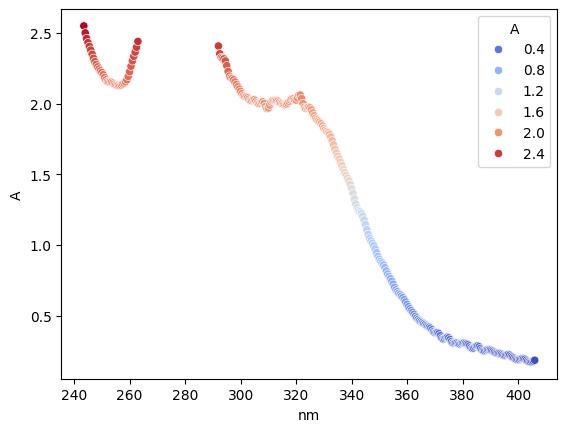

In [12]:
sb.scatterplot(x=x, y=y, data=datos, hue="A", palette="coolwarm")

array([[<Axes: title={'center': 'nm'}>, <Axes: title={'center': 'A'}>]],
      dtype=object)

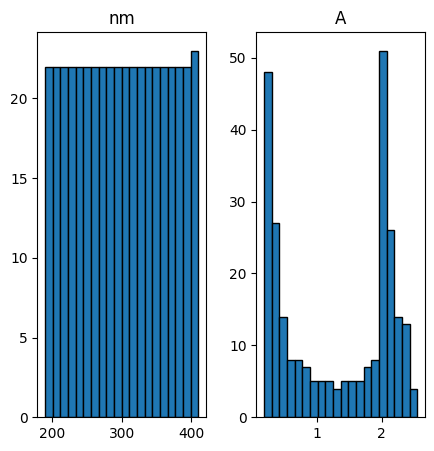

In [13]:
datos.hist(figsize=(5,5), bins=20, edgecolor="black", grid=False)

In [14]:
x.describe()

count    441.000000
mean     300.000000
std       63.724995
min      190.000000
25%      245.000000
50%      300.000000
75%      355.000000
max      410.000000
Name: nm, dtype: float64

In [15]:
y.describe()

count    269.000000
mean       1.281922
std        0.826436
min        0.172000
25%        0.347000
50%        1.453000
75%        2.034000
max        2.550000
Name: A, dtype: float64

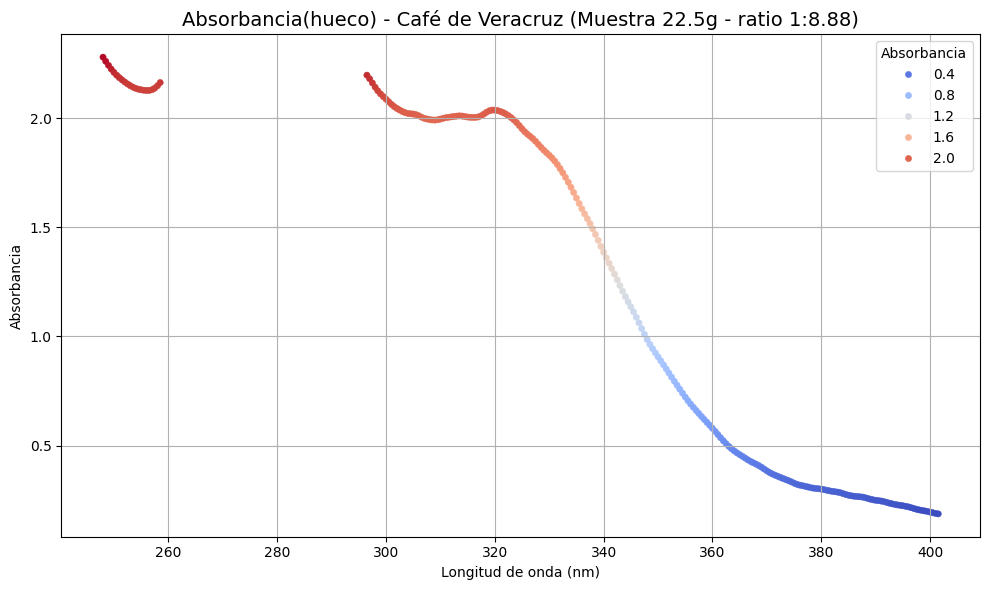

In [16]:
from scipy.signal import savgol_filter
import seaborn as sb
import matplotlib.pyplot as plt

# Crear columna suavizada
datos['A_suave'] = savgol_filter(datos['A'], window_length=19, polyorder=3)

# Graficar scatterplot con suavizado y gradiente de color
plt.figure(figsize=(10, 6))
sb.scatterplot(x='nm', y='A_suave', data=datos, hue='A_suave', palette='coolwarm', s=20, edgecolor=None)
plt.title("Absorbancia(hueco) - Café de Veracruz (Muestra 22.5g - ratio 1:8.88)", fontsize=14)
plt.xlabel("Longitud de onda (nm)")
plt.ylabel("Absorbancia")
plt.legend(title='Absorbancia', loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()